In [1]:
# utilities
import re
import numpy as np
import pandas as pd
import string
import urllib
import matplotlib.pyplot as plt

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from plotly import graph_objects as go

# nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Libraries from Sklearn
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Train and test data
df_train = pd.read_csv('train_set.csv') #train data
df_test = pd.read_csv('test_set.csv')  # test data

## Basic Exploration

In [3]:
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [4]:
df_train['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

In [5]:
df_train['lang_id'].nunique()

11

In [6]:
df_train['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

Hurray! Balanced dataset😊

In [7]:
# Check the shape of the dataset
df_train.shape

(33000, 2)

In [8]:
# print a concise summary of a DataFrame

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [9]:
# Check for missing values in individual columns

df_train.isna().sum()

lang_id    0
text       0
dtype: int64

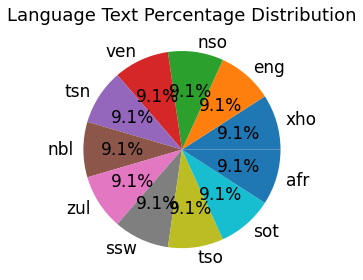

In [10]:
# Visualising the percentage distribution of sentiments
plt.pie(df_train.lang_id.value_counts().values, 
        labels = df_train.lang_id.value_counts().index, 
        autopct = '%2.1f%%', textprops={'fontsize': 17})
plt.title('Language Text Percentage Distribution', fontsize=18)
plt.tight_layout()
plt.show()

In [11]:
df_train['length'] = df_train['text'].apply(len)

In [12]:
df_train

,lang_id,text,length
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,220
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,252
2,eng,the province of kwazulu-natal department of tr...,264
3,nso,o netefatša gore o ba file dilo ka moka tše le...,217
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,239
...,...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,272
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...,298
32997,eng,closing date for the submission of completed t...,222
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,228


In [13]:
df_train.describe()

,length
count,33000.000000
mean,244.907545
std,28.475588
min,201.000000
25%,220.000000
50%,243.000000
75%,269.000000
max,299.000000


## Data Preprocessing

In [14]:
X= df_train.text
y= df_train.lang_id

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [16]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape 

(33000, 105196)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)